Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('C:/config/matplotlib/stylelib/cosmicshine.mplstyle')

1. Statistical analysis of a series of random variables

In [4]:
def q11(M_b,n_b):
    Z = np.random.rand(n_b,M_b) #Array des z_i
    V_z = np.var(Z)
    V_Z = np.var(np.mean(Z,axis=1))
    print(V_z)
    print(M_b*V_Z)

q11(10000,10000)

0.08333610603269105
0.08096359074993556


In [101]:
def q12(M_b,n_b,p):
    theta_0 = np.random.rand(M_b * n_b)
    theta = np.zeros(M_b * n_b)
    
    for i,theta_i in enumerate(theta_0[:-2]):
        xi = np.random.rand()
        if (theta_i - 0.5)*(xi - 0.5) >= 0:
            theta[i+1]=xi
        else: 
            eta = np.random.rand()
            if eta < p:
                theta[i+1]=theta_i
            else:
                theta[i+1]=xi
    return(theta_0,theta)    

M_b = 1000
n_b = 1000
p=0.99
theta_0,theta = q12(M_b,n_b,p)

V_theta = np.var(theta)
V_THETA = np.var(np.mean(np.reshape(theta,(M_b,n_b)),axis=1))

In [102]:
tau = 0.5 * V_THETA * M_b/V_theta
print(tau)

0.5052907378408177


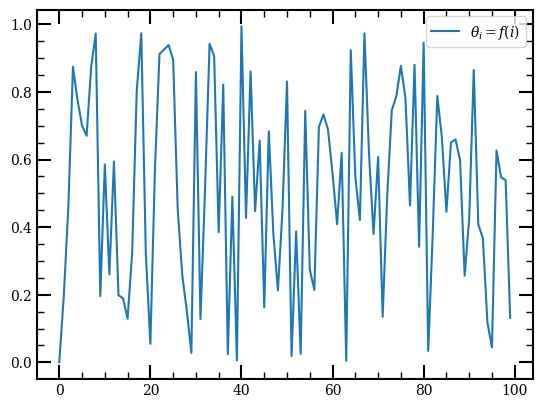

In [103]:
### 1.3 :
plt.plot(theta[:100],label='$\\theta_i = f(i)$')
plt.legend()

2. Transform with Monte Carlo

In [112]:
from cmath import cos


def p(x):
    return np.exp(-x**2)/np.sqrt(np.pi)

def equil(M_eq,x_0,delta):
    X = np.zeros(M_eq)
    X[0] = x_0
    for i in range(1,len(X)):
        d_x = 2*delta*(np.random.rand(1) - 0.5)
        A_MH = min(1,p(X[i-1] + d_x)/p(X[i-1]))
        if np.random.rand() < A_MH:
            X[i] = X[i-1] + d_x
        else :
            X[i] = X[i-1]
    return X

def mesurement(M,M_eq,x_0,delta,k):
    S=0
    X=equil(M,equil(M_eq,x_0,delta)[-1],delta)
    for i in range(M):
        S+=np.cos(k*X[i])/(M*np.sqrt(2))
    return S

def mesurement2(M,M_eq,x_0,delta,k):
    S=0
    X=equil(M,equil(M_eq,x_0,delta)[-1],delta)
    for i in range(M):
        S+=np.cos(k*X[i])*np.exp(-eps*X[i]**4)/(M*np.sqrt(2))
    return S

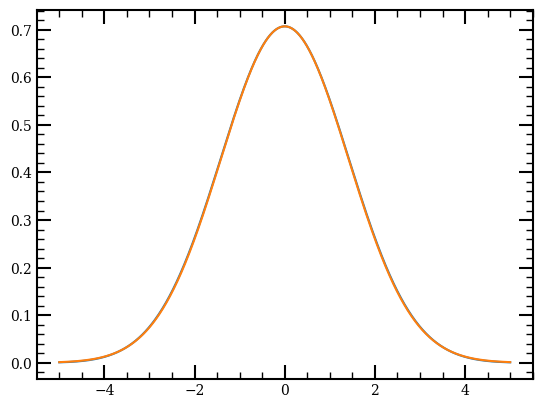

In [113]:
from cmath import sqrt


M=10000
M_eq=1000
x_0 = 0
delta = 2

K = np.linspace(-5,5,1000)
def gaussian(K):
    return(np.exp(-K**2 / 4)/np.sqrt(2))

plt.plot(K,mesurement(M,M_eq,x_0,delta,K))
plt.plot(K,gaussian(K))

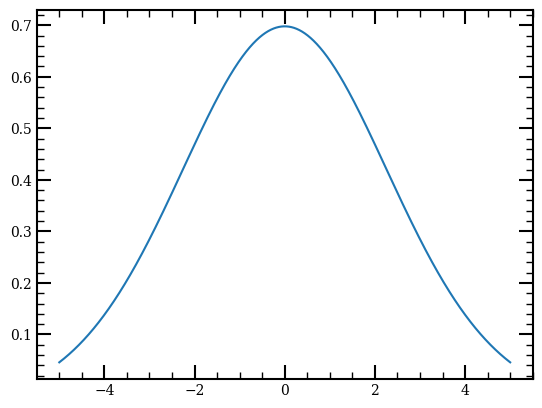

In [114]:
eps = 0.1
    
M=10000
M_eq=1000
x_0 = 0
delta = 0.1

K = np.linspace(-5,5,100000)

plt.plot(K,mesurement2(M,M_eq,x_0,delta,K))

3. Deviation from equiparition in a non-linear harmonic oscillator